# Graphs using Stata

<blockquote><p>Dimitrios Karamanis <br />
University of Piraeus<br />
dkaramanis@hotmail.com</p>
</blockquote>

In [2]:
%matplotlib inline
from ipystata.config import config_stata
from IPython.display import Image
from IPython.core.display import HTML 
config_stata('C:\Program Files\Stata14\StataSE-64.exe')

Terminated 1 unattached Stata session(s).


ITEMS: <br>
<li> Simple Line Graph
<li> Multiple Dependent Variables
<li> Scatterplot matrix
<li>Scatterplot with weighted markers
<li> Dot Chart
<li> Horizontal bar chart graphed over another variable, sorted
<li> Box plot by values of categorical variable
<li> Overlaying Two-Way Plot Types <br> </li>
<li>Adding a Title and Removing the Legend <br> </li>
<li>Showing Confidence Intervals, Labelling Axes, Modifyng Legend <br> </li>
<li>Marker Labels and Subtitles <br>
<li>Position of Marker Labels <br>
<li>Position of Marker Labels and Legend Display <br>
<li>Marker Size and Symbol, Line Color  <br>
<li>Marker and Marker Label Color, Line Style  <br>
<li>By-Graph: Separate Graphs for Each Subset of Data <br>
<li>By-Graph Options <br>
<li>Axis Scale, Ticks and Labels <br>
<li>Storing Graphs in Memory  <br>
<li>Combining Graphs <br>
<br>
Appearance of graph defined by graph elements: <br>
<li>data - marker symbols, lines <br> </li>
<li>elements within plot region – text, marker labels, line labels <br> </li>
<li>elements outside plot region – titles, legend, notes, axis labels, tick marks, axis titles <br> </li>
<li>size and shape of plot region and entire grap <br> </li>
<br>
LINK: <br>
 [Visual overview of creating graphs](https://www.stata.com/support/faqs/graphics/gph/stata-graphs/)

<h1>We will use two datasets from stata's ready ones.</h1><br>
First let's explore the data <br>
Τhe first one 'uslifeexp.dta' has to do with "U.S. life expectancy, 1900-1999"  <br>
Τhe second one 'lifeexp.dta' ha to do with "Life expectancy for 1998 in 68 countries"

In [63]:
%%stata
#the first dataset
sysuse uslifeexp.dta, clear
describe
summarize

Unknown #command

(U.S. life expectancy, 1900-1999)

Contains data from C:\Program Files\Stata14\ado\base/u/uslifeexp.dta
  obs:           100                          U.S. life expectancy, 1900-1999
 vars:            10                          30 Mar 2014 04:31
 size:         3,800                          (_dta has notes)
--------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------------------------
year            int     %9.0g                 Year
le              float   %9.0g                 life expectancy
le_male         float   %9.0g                 Life expectancy, males
le_female       float   %9.0g                 Life expectancy, females
le_w            float   %9.0g                 Life expectancy, whites
le_wmale        float   %9.0g                 Life

In [8]:
%%stata
##the second
sysuse lifeexp.dta, clear
describe
summarize

## see how many different countries do we have
codebook(country)
#we have 68 observations, 6 variables

Unknown #command

(Life expectancy, 1998)

Contains data from C:\Program Files\Stata14\ado\base/l/lifeexp.dta
  obs:            68                          Life expectancy, 1998
 vars:             6                          26 Mar 2014 09:40
 size:         2,652                          (_dta has notes)
-------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
-------------------------------------------------------------------------------------------------------------------------
region          byte    %12.0g     region     Region
country         str28   %28s                  Country
popgrowth       float   %9.0g               * Avg. annual % growth
lexp            byte    %9.0g               * Life expectancy at birth
gnppc           float   %9.0g               * GNP per capita
safewater       byte    %9.0g              

## Simple Line Graph <br>
See three different ways


(U.S. life expectancy, 1900-1999)



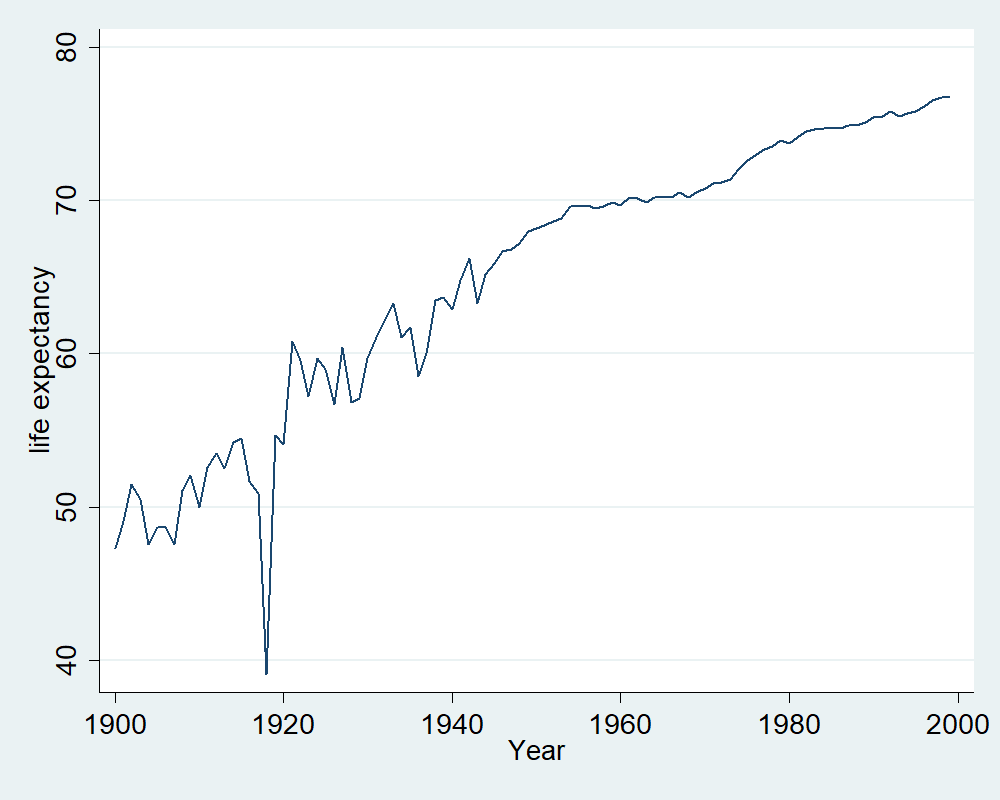

In [64]:
%%stata
sysuse uslifeexp.dta, clear

graph twoway line le year

(U.S. life expectancy, 1900-1999)



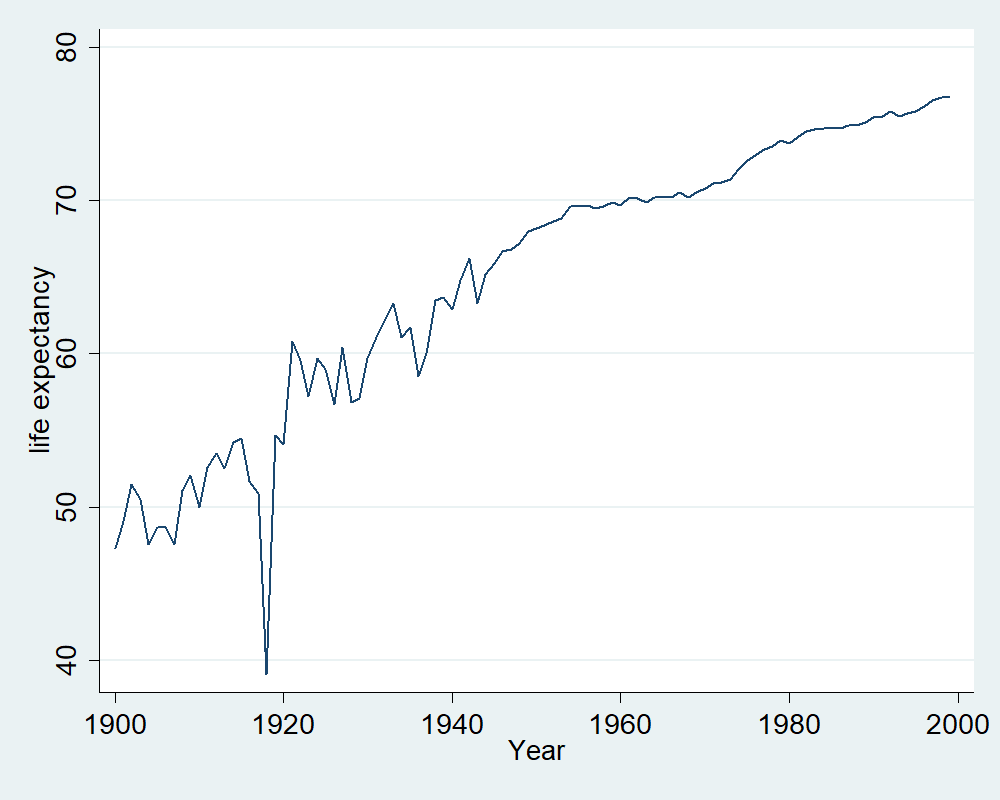

In [65]:
%%stata
sysuse uslifeexp.dta, clear

twoway line le year

(U.S. life expectancy, 1900-1999)



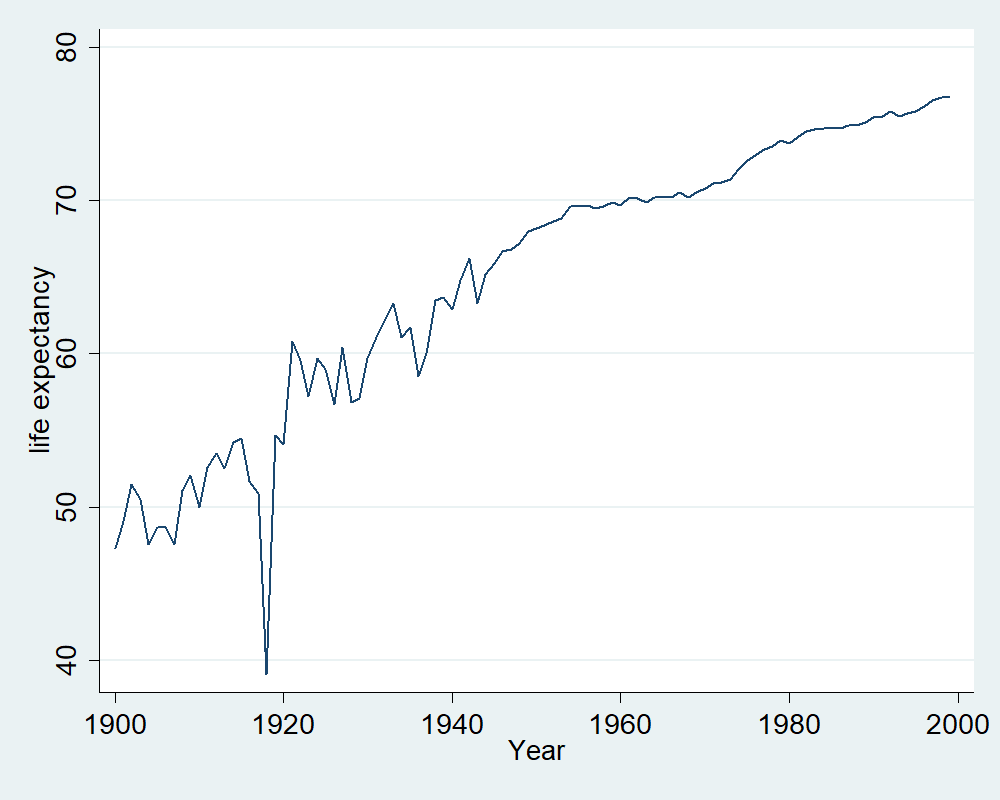

In [67]:
%%stata
sysuse uslifeexp.dta, clear

line le year

(U.S. life expectancy, 1900-1999)



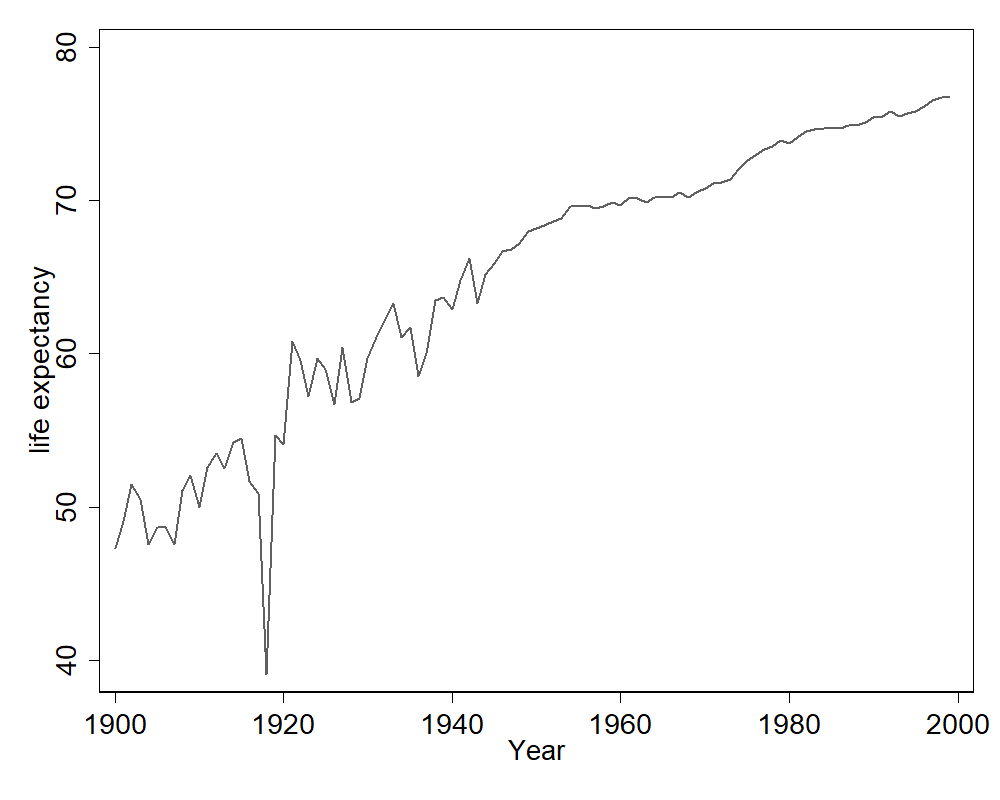

In [9]:
%%stata
sysuse uslifeexp.dta, clear

twoway line le year, scheme(s1mono)

(U.S. life expectancy, 1900-1999)



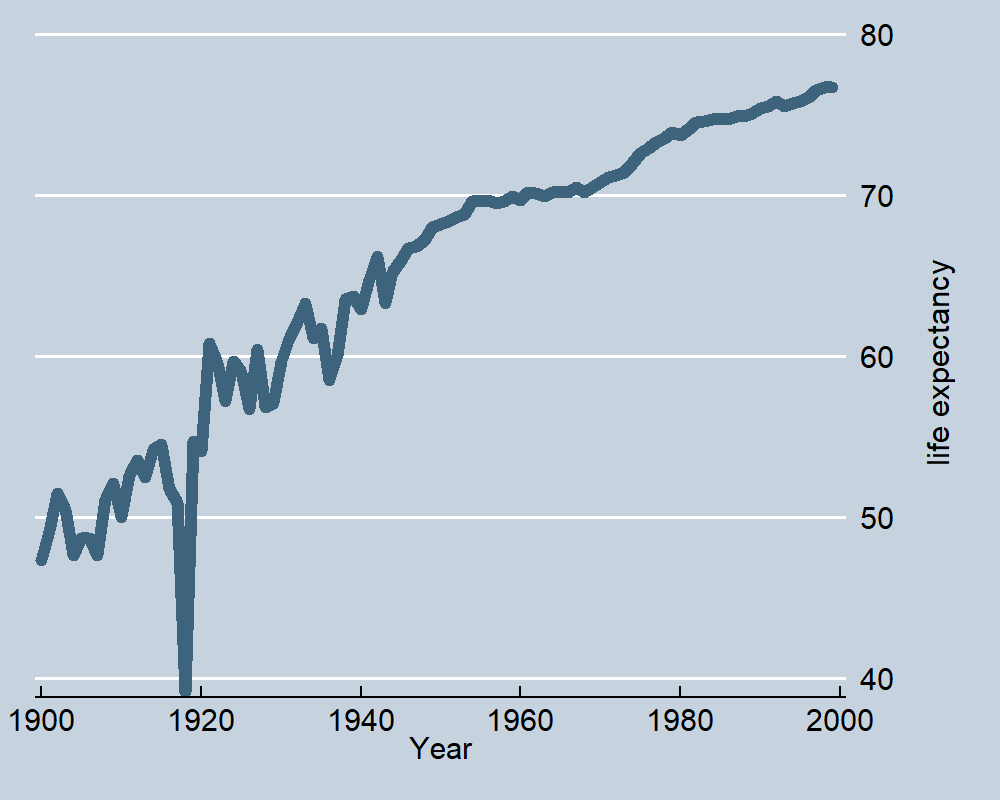

In [10]:
%%stata
sysuse uslifeexp.dta, clear

twoway line le year,  scheme(economist)

## Multiple Dependent Variables

(U.S. life expectancy, 1900-1999)



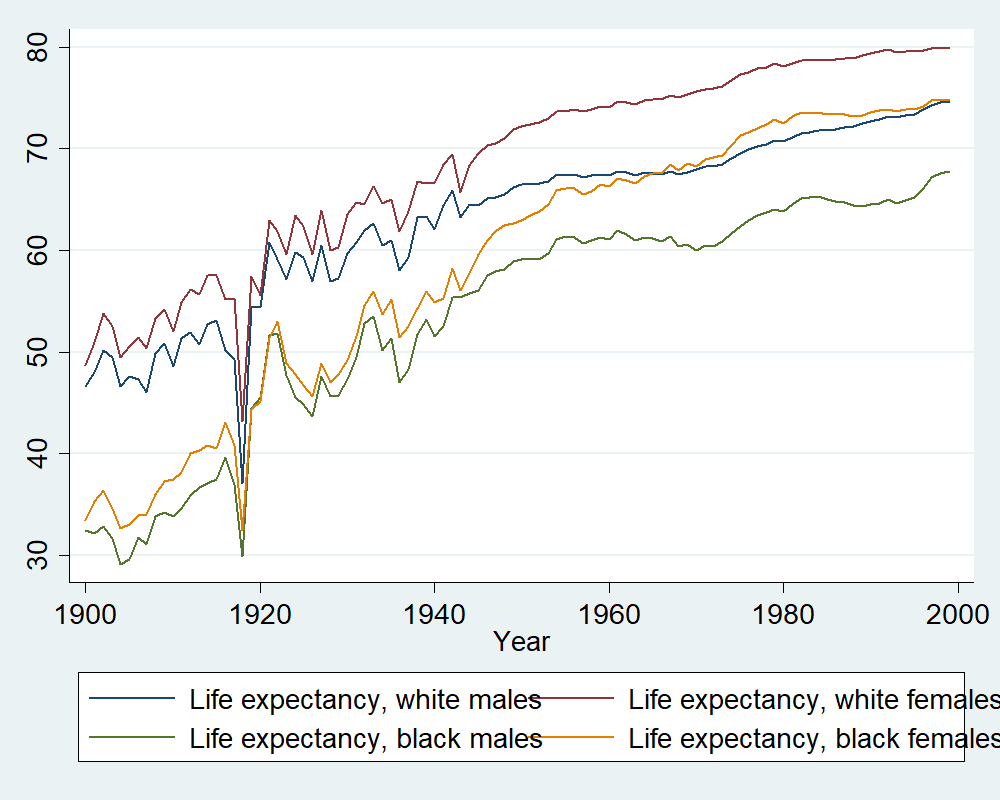

In [11]:
%%stata
sysuse uslifeexp.dta, clear

twoway line le_wmale le_wfemale le_bmale le_bfemale year

(U.S. life expectancy, 1900-1999)

. twoway line le_wmale le_wfemale le_bmale le_bfemale year , text(32 1920 "{bf:1918} {it:Influenza} Pandemic", place(3))



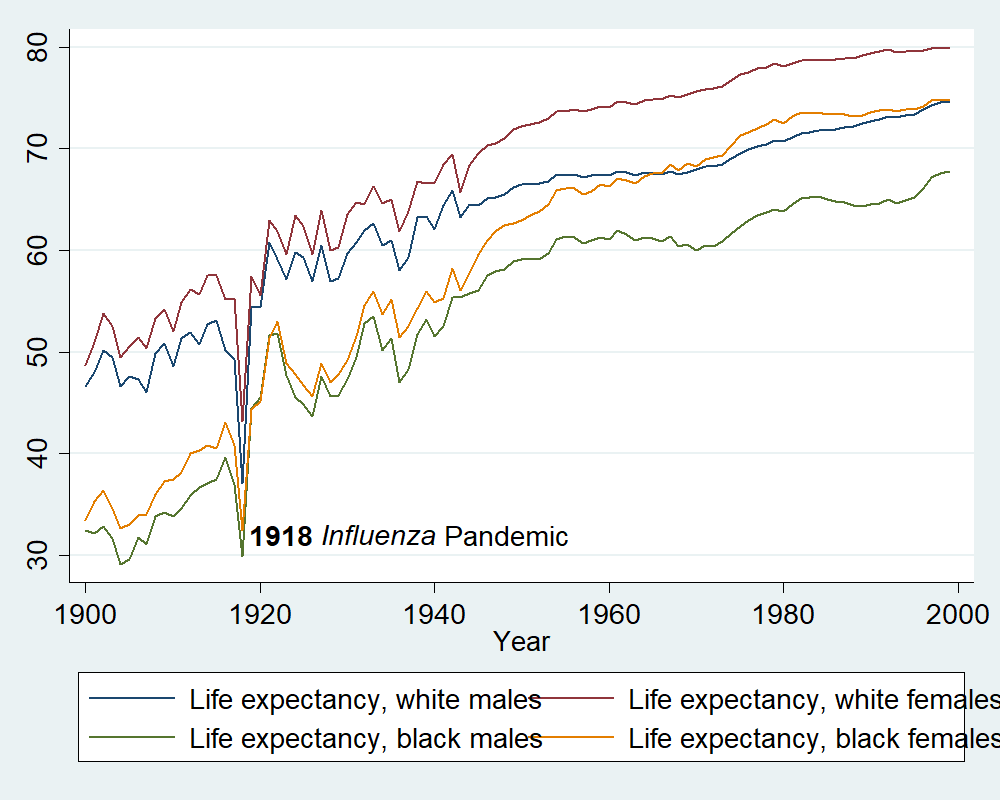

In [22]:
%%stata
sysuse uslifeexp.dta, clear

twoway line le_wmale le_wfemale le_bmale le_bfemale year  ///
, text(32 1920 "{bf:1918} {it:Influenza} Pandemic", place(3))

## Scatterplot matrix

(Life expectancy, 1998)



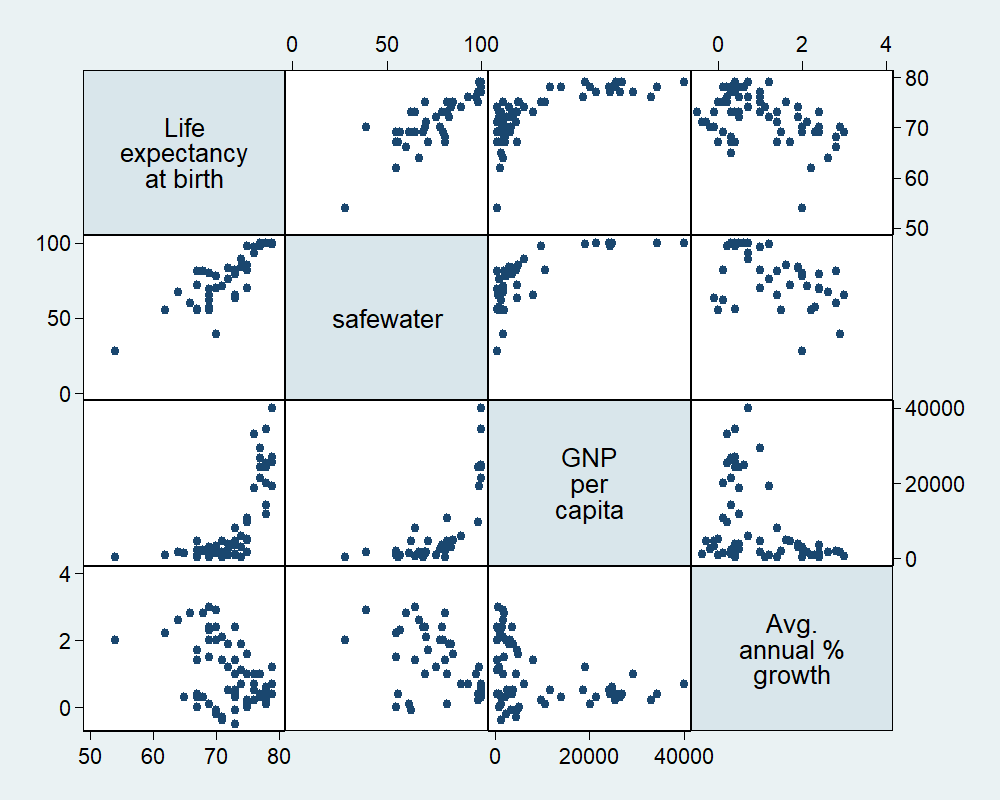

In [8]:
%%stata
sysuse lifeexp.dta, clear

graph matrix lexp safewater gnppc popgrowth

## Scatterplot with weighted markers

(Life expectancy, 1998)

(analytic weights assumed)
(analytic weights assumed)
(analytic weights assumed)



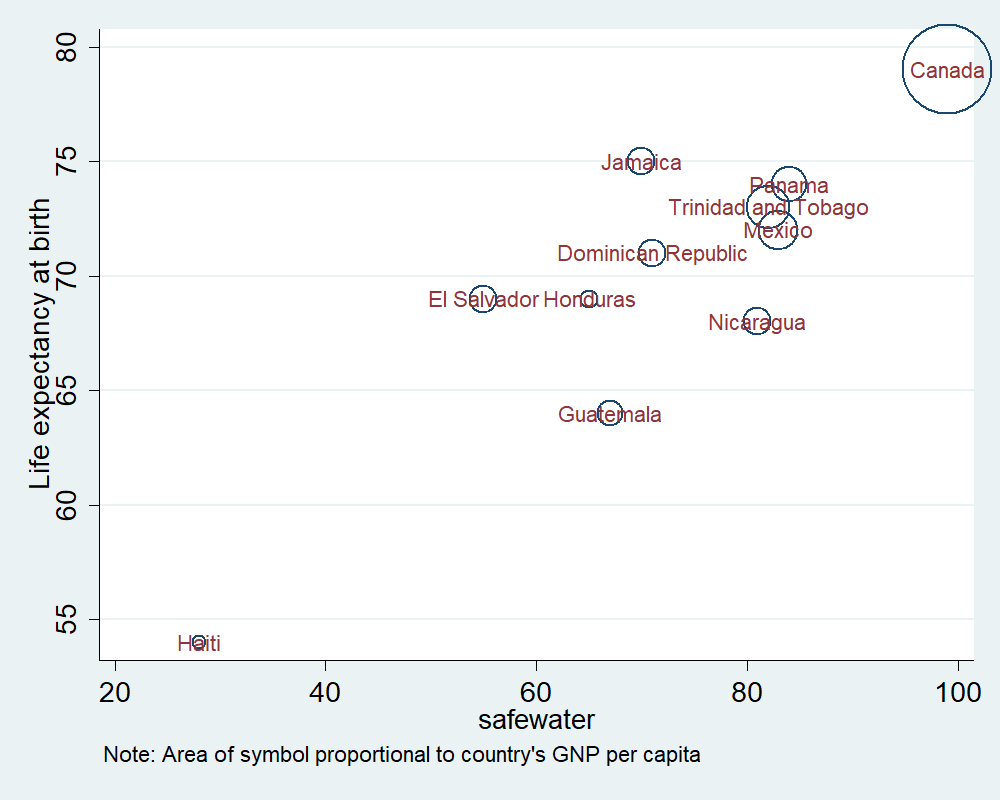

In [13]:
%%stata
sysuse lifeexp.dta, clear

twoway scatter  lexp safewater  [w= gnppc] if region==2  /* North America */ /// 
    & gnppc ~=., msymbol(circle_hollow) || scatter lexp safewater  if region==2 & gnppc ~=., ///
    msymbol(none)  mlabel(country)  mlabposition(0) legend(off) ///
    note("Note: Area of symbol proportional to country's GNP per capita")

## Dot chart

(Life expectancy, 1998)



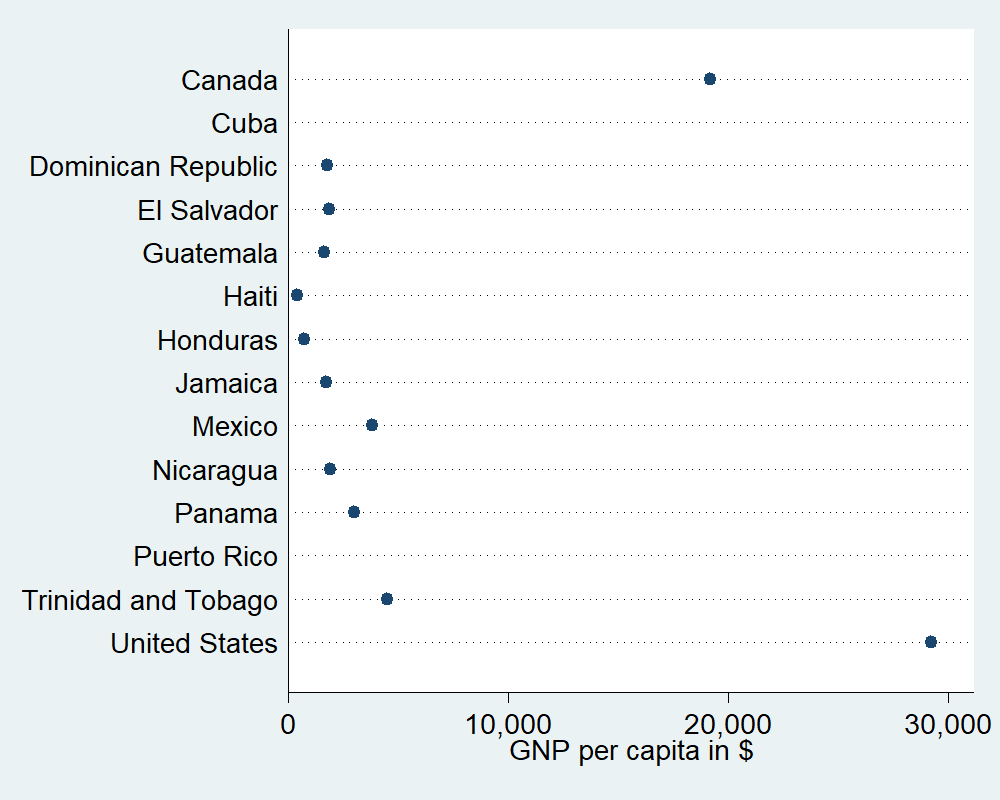

In [17]:
%%stata
sysuse lifeexp.dta, clear

graph dot gnppc if region==2 , over(country) ytitle(GNP per capita in $)

## Horizontal bar chart graphed over another variable, sorted

(Life expectancy, 1998)



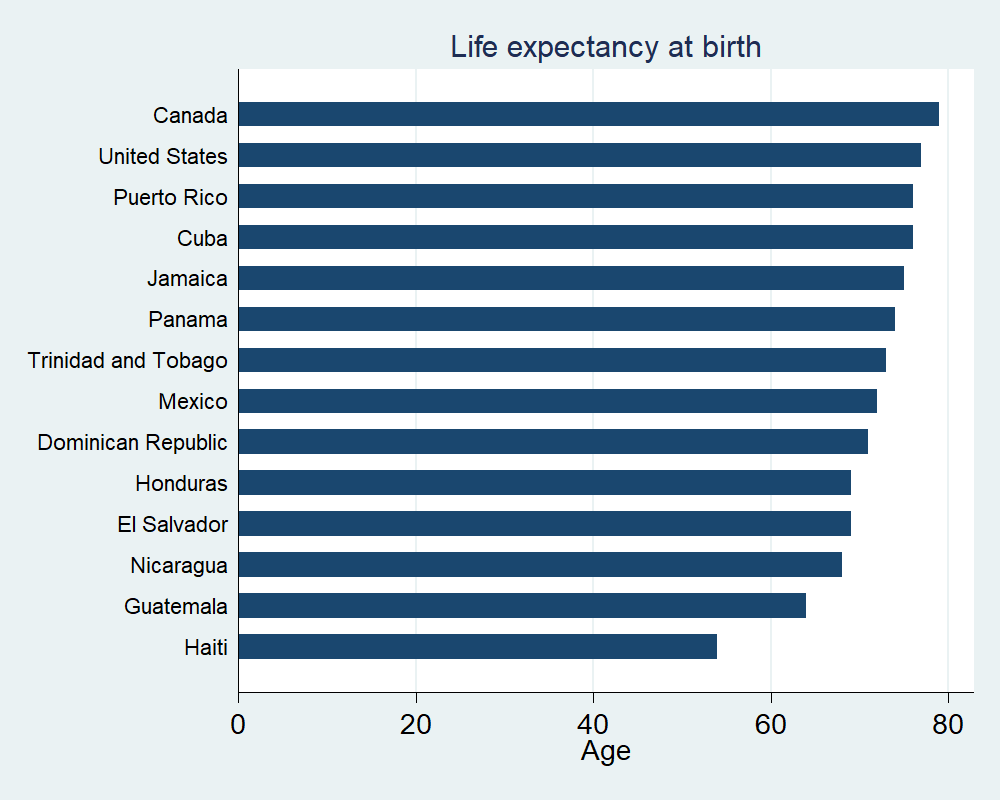

In [6]:
%%stata
sysuse lifeexp.dta, clear

graph hbar  lexp if region==2 , over(country  , sort(1) ///
 descending label(labsize(small))) ///
 title("Life expectancy at birth" ,size(medium)) ///
 ytitle("Age")

## Box plot by values of categorical variable

(Life expectancy, 1998)



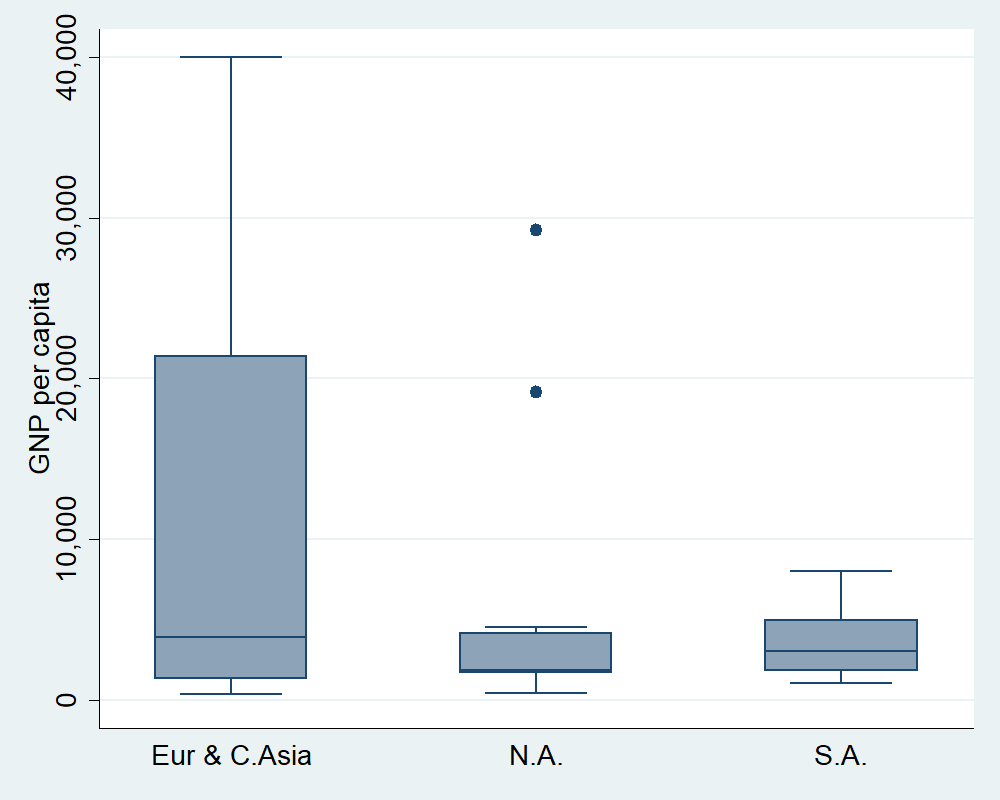

In [18]:
%%stata
sysuse lifeexp.dta, clear

graph box gnppc , over( region )

## Overlaying Two-Way Plot Types

(U.S. life expectancy, 1900-1999)



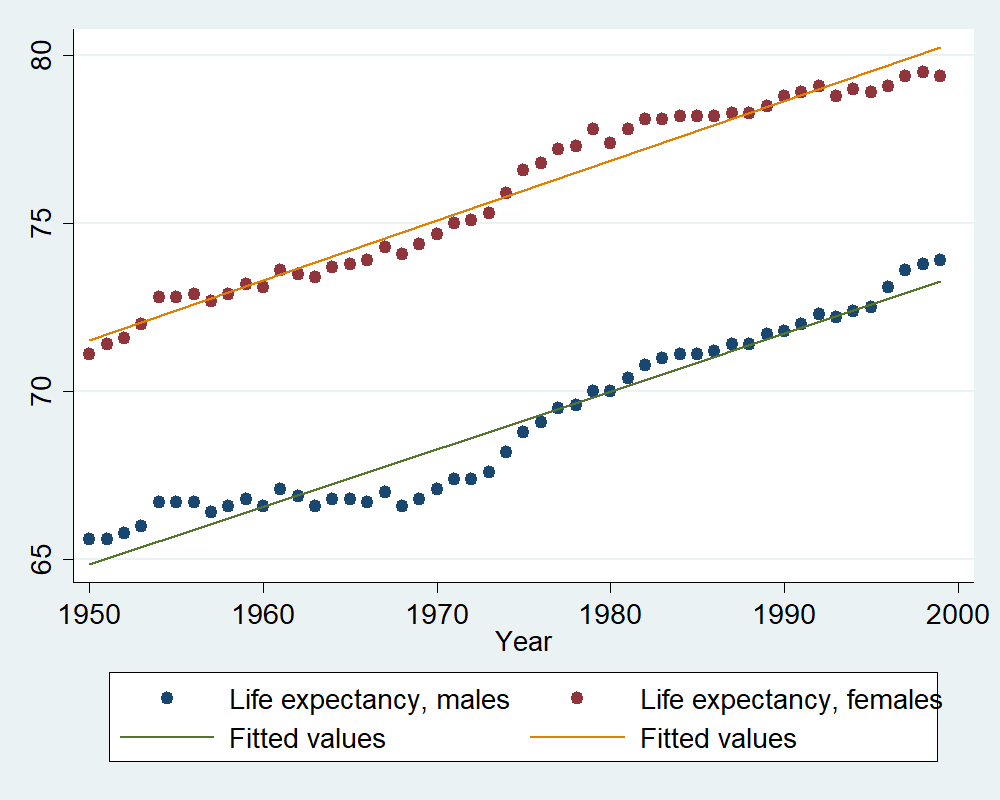

In [46]:
%%stata
sysuse uslifeexp.dta, clear

scatter le_male le_female year if year >= 1950 ///
|| lfit le_male   year if year >= 1950 ///
|| lfit le_female year if year >= 1950

## Overlaying Two-Way Plot Types - Adding a Title and Removing the Legend

(U.S. life expectancy, 1900-1999)



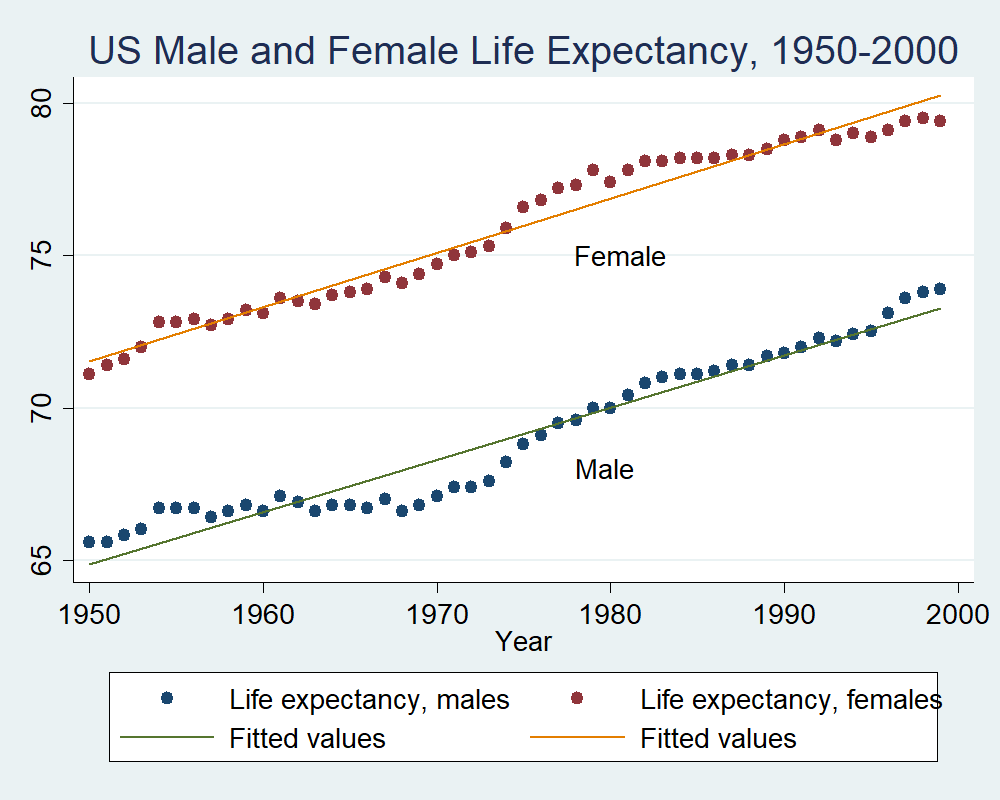

In [47]:
%%stata
sysuse uslifeexp.dta, clear

scatter le_male le_female year if year >= 1950 ///
|| lfit le_male   year if year >= 1950 ///
|| lfit le_female year if year >= 1950 ///
,title("US Male and Female Life Expectancy, 1950-2000") ///
 text(75 1978 "Female", place(3)) ///
 text(68 1978 "Male", place(3))
 

## Showing Confidence Intervals, Labelling Axes, Modifyng Legend 

(Life expectancy, 1998)



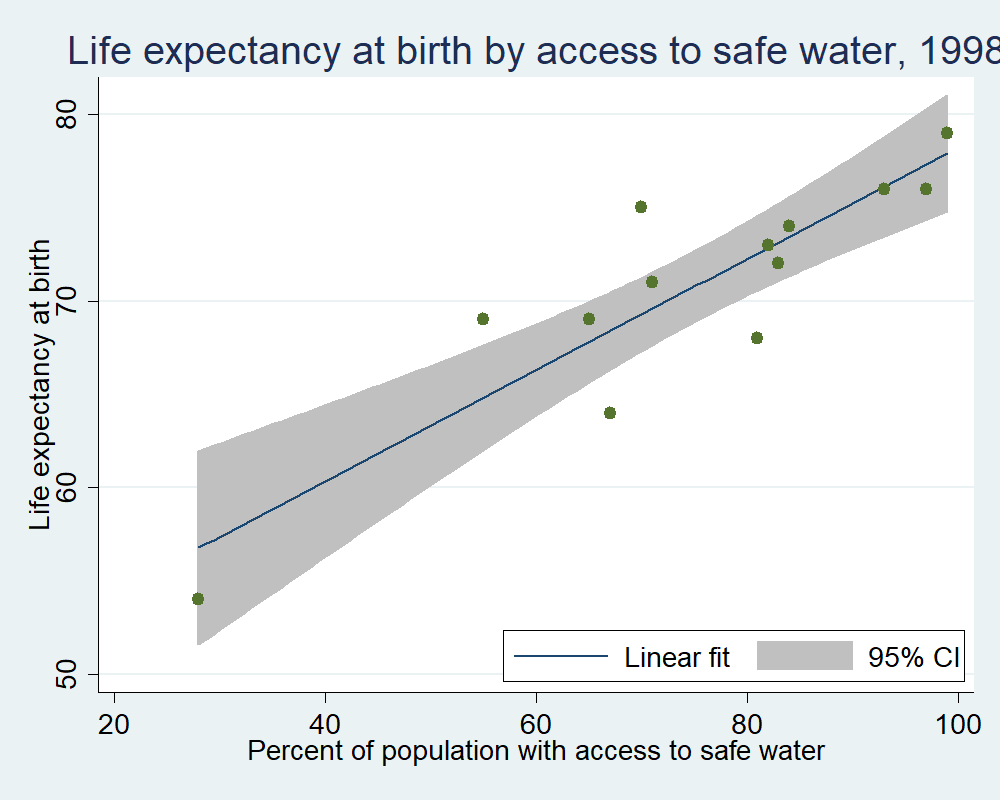

In [14]:
%%stata
sysuse lifeexp.dta, clear

twoway ///
 (lfitci  lexp safewater if region == 2) /* North America */ ///
 (scatter lexp safewater if region == 2) ///
,title("Life expectancy at birth by access to safe water, 1998")  ///
 ytitle("Life expectancy at birth") ///
 xtitle("Percent of population with access to safe water") ///
 legend(ring(0) pos(5) order(2 "Linear fit" 1 "95% CI"))

## Marker Labels and Subtitles

(Life expectancy, 1998)



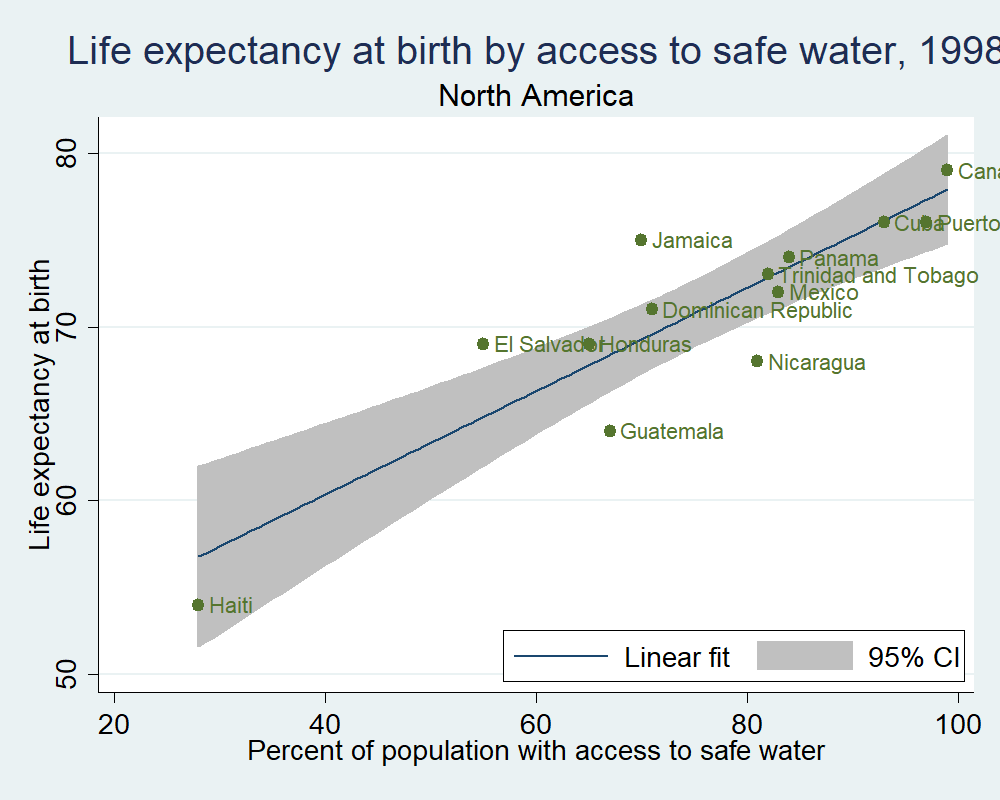

In [15]:
%%stata
sysuse lifeexp.dta, clear

twoway ///
 (lfitci  lexp safewater if region == 2) /* North America */ ///
 (scatter lexp safewater if region == 2, mlabel(country)) ///
,title("Life expectancy at birth by access to safe water, 1998") ///
 subtitle("North America")  ///
 ytitle("Life expectancy at birth") ///
 xtitle("Percent of population with access to safe water") ///
 legend(ring(0) pos(5) order(2 "Linear fit" 1 "95% CI"))

## Position of Marker Labels

(Life expectancy, 1998)

(67 missing values generated)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)



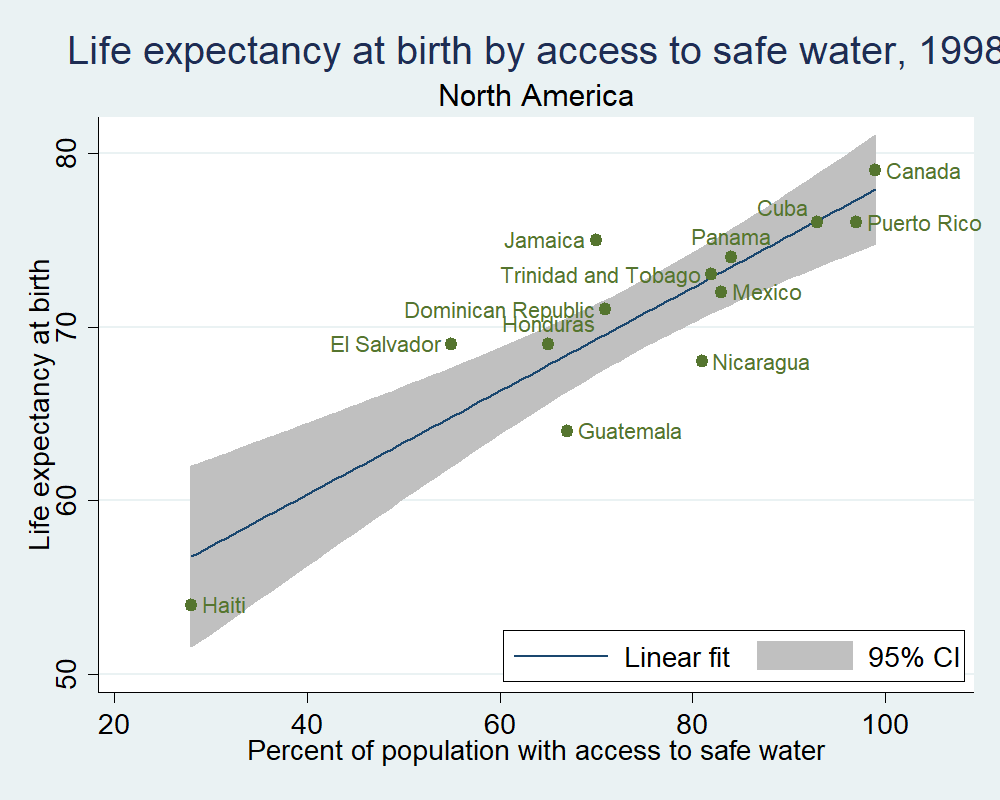

In [50]:
%%stata
sysuse lifeexp.dta, clear

generate pos = 12 if country == "Panama"
replace  pos = 12 if country == "Honduras"
replace  pos = 10 if country == "Cuba"
replace  pos =  9 if country == "Jamaica"
replace  pos =  9 if country == "El Salvador"
replace  pos =  9 if country == "Trinidad and Tobago"
replace  pos =  9 if country == "Dominican Republic"

twoway ///
 (lfitci  lexp safewater if region == 2) /* North America */ ///
 (scatter lexp safewater if region == 2 ///
  , mlabel(country) mlabvposition(pos)) ///
,title("Life expectancy at birth by access to safe water, 1998") ///
 subtitle("North America")  ///
 ytitle("Life expectancy at birth") ///
 xtitle("Percent of population with access to safe water") ///
 legend(ring(0) pos(5) order(2 "Linear fit" 1 "95% CI")) ///
 plotregion(margin(r+10))

## Position of Marker Labels

(Life expectancy, 1998)



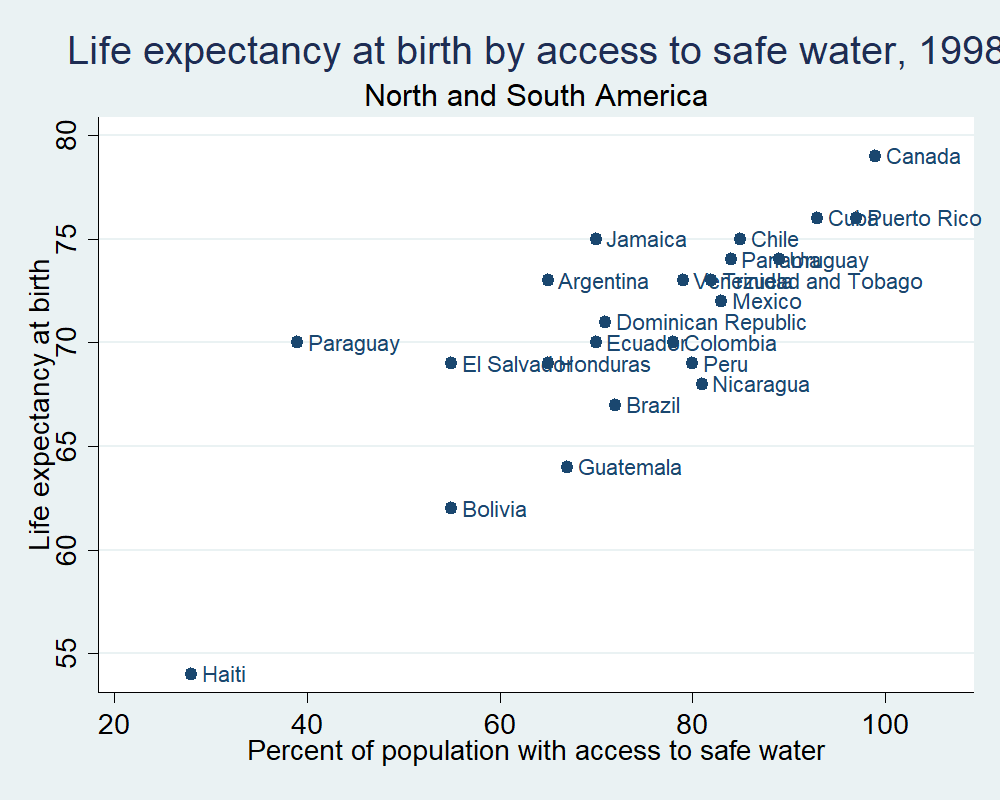

In [51]:
%%stata
sysuse lifeexp.dta, clear

twoway (scatter lexp safewater if region == 2 | region == 3 ///
  ,mlabel(country)) ///
 ,title("Life expectancy at birth by access to safe water, 1998") ///
 subtitle("North and South America")  ///
 ytitle("Life expectancy at birth") ///
 xtitle("Percent of population with access to safe water") ///
 plotregion(margin(r+10))

## Position of Marker Labels and Legend Display

(Life expectancy, 1998)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)



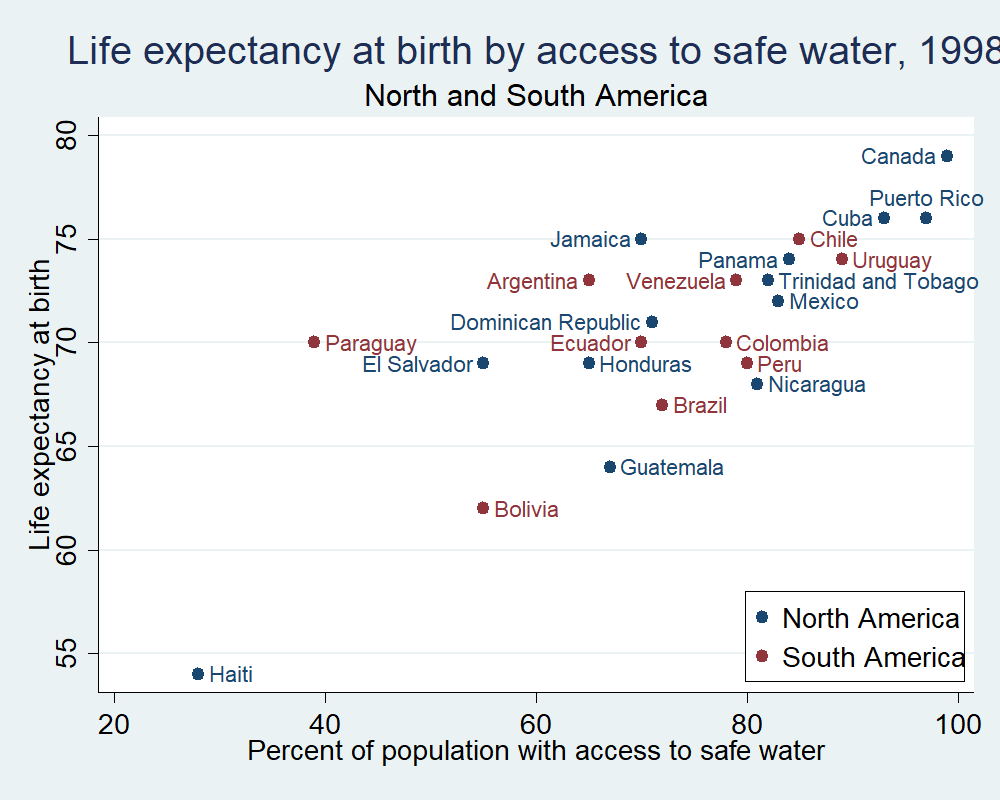

In [52]:
%%stata
sysuse lifeexp.dta, clear

generate pos =  3
replace  pos =  9 if country == "Argentina"
replace  pos =  9 if country == "Canada"
replace  pos =  9 if country == "Cuba"
replace  pos =  9 if country == "Panama"
replace  pos =  9 if country == "Venezuela"
replace  pos =  9 if country == "Jamaica"
replace  pos =  9 if country == "Dominican Republic"
replace  pos =  9 if country == "Ecuador"
replace  pos =  9 if country == "El Salvador"
replace  pos = 12 if country == "Puerto Rico"

twoway ///
 (scatter lexp safewater if region == 2 ///
  ,mlabel(country) mlabvposition(pos)) ///
 (scatter lexp safewater if region == 3 ///
  ,mlabel(country) mlabvposition(pos)) ///
,title("Life expectancy at birth by access to safe water, 1998") ///
 subtitle("North and South America")  ///
 ytitle("Life expectancy at birth") ///
 xtitle("Percent of population with access to safe water") ///
 legend(ring(0) pos(5) order(1 "North America" 2 "South America") cols(1))

## Marker Size and Symbol, Line Color 

(Life expectancy, 1998)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)



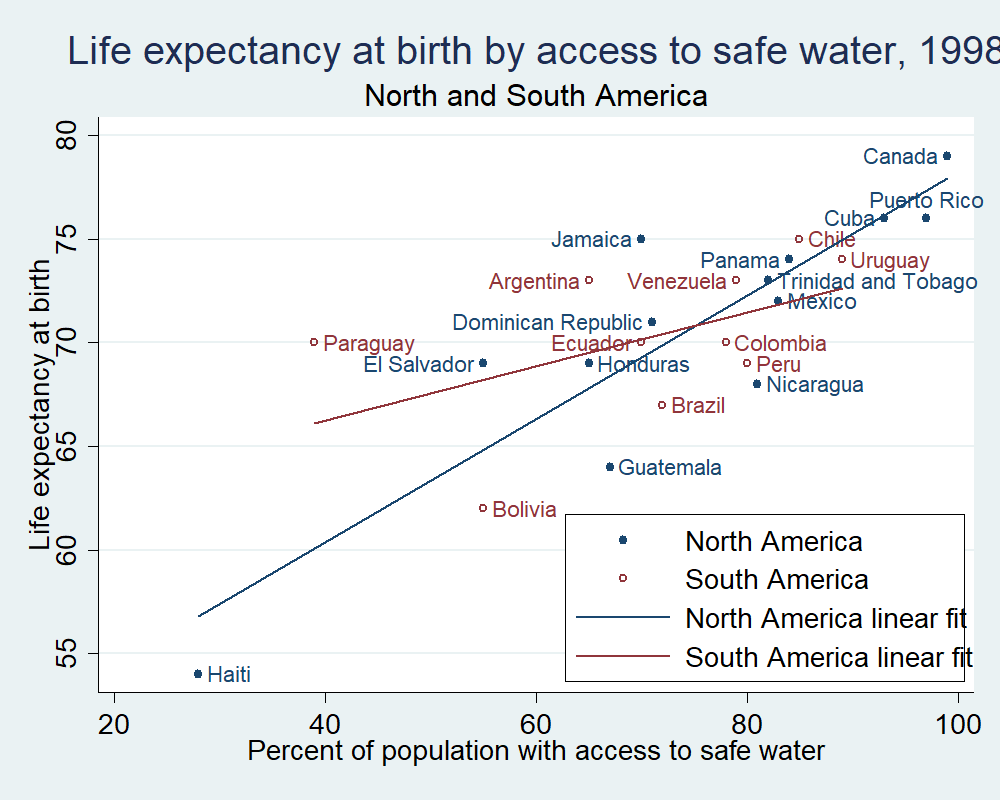

In [53]:
%%stata
sysuse lifeexp.dta, clear

generate pos =  3
replace  pos =  9 if country == "Argentina"
replace  pos =  9 if country == "Canada"
replace  pos =  9 if country == "Cuba"
replace  pos =  9 if country == "Panama"
replace  pos =  9 if country == "Venezuela"
replace  pos =  9 if country == "Jamaica"
replace  pos =  9 if country == "Dominican Republic"
replace  pos =  9 if country == "Ecuador"
replace  pos =  9 if country == "El Salvador"
replace  pos = 12 if country == "Puerto Rico"

twoway ///
 (scatter lexp safewater if region == 2 ///
  ,mlabel(country) mlabvposition(pos) msize(small)) ///
 (scatter lexp safewater if region == 3 ///
  ,mlabel(country) mlabvposition(pos) msize(small) msymbol(circle_hollow)) ///
(lfit lexp safewater if region == 2, clcolor(navy)) ///
(lfit lexp safewater if region == 3, clcolor(maroon)) ///
,title("Life expectancy at birth by access to safe water, 1998") ///
 subtitle("North and South America")   ///
 ytitle("Life expectancy at birth") ///
 xtitle("Percent of population with access to safe water") ///
 legend(ring(0) pos(5) cols(1) order(1 "North America" 2 "South America"  ///
   3 "North America linear fit" 4 "South America linear fit"))

## Marker and Marker Label Color, Line Style 

(Life expectancy, 1998)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

Unknown #command



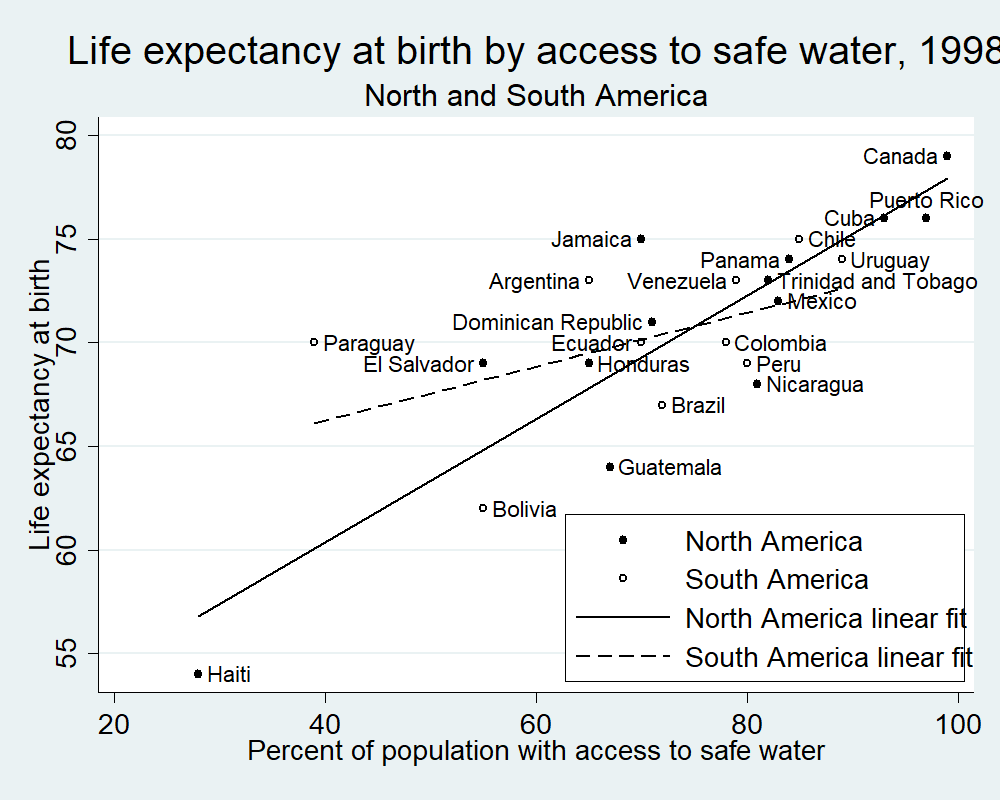

In [54]:
%%stata
sysuse lifeexp.dta, clear

generate pos =  3
replace  pos =  9 if country == "Argentina"
replace  pos =  9 if country == "Canada"
replace  pos =  9 if country == "Cuba"
replace  pos =  9 if country == "Panama"
replace  pos =  9 if country == "Venezuela"
replace  pos =  9 if country == "Jamaica"
replace  pos =  9 if country == "Dominican Republic"
replace  pos =  9 if country == "Ecuador"
replace  pos =  9 if country == "El Salvador"
replace  pos = 12 if country == "Puerto Rico"
#delimit ;
twoway ///
 (scatter lexp safewater if region == 2 ///
  ,mlabel(country) mlabvposition(pos) msize(small) mcolor(black) mlabcolor(black)) ///
 (scatter lexp safewater if region == 3 ///
  ,mlabel(country) mlabvposition(pos) msize(small) mcolor(black) mlabcolor(black) ///
   msymbol(circle_hollow)) ///
(lfit lexp safewater if region == 2, clcolor(black)) ///
(lfit lexp safewater if region == 3, clcolor(black) clpattern(dash)) ///
,title("Life expectancy at birth by access to safe water, 1998", color(black)) ///
 subtitle("North and South America") /// 
 ytitle("Life expectancy at birth") ///
 xtitle("Percent of population with access to safe water") ///
 legend(ring(0) pos(5) cols(1) order(1 "North America" 2 "South America" /// 
   3 "North America linear fit" 4 "South America linear fit"))

## By-Graph: Separate Graphs for Each Subset of Data

(Life expectancy, 1998)



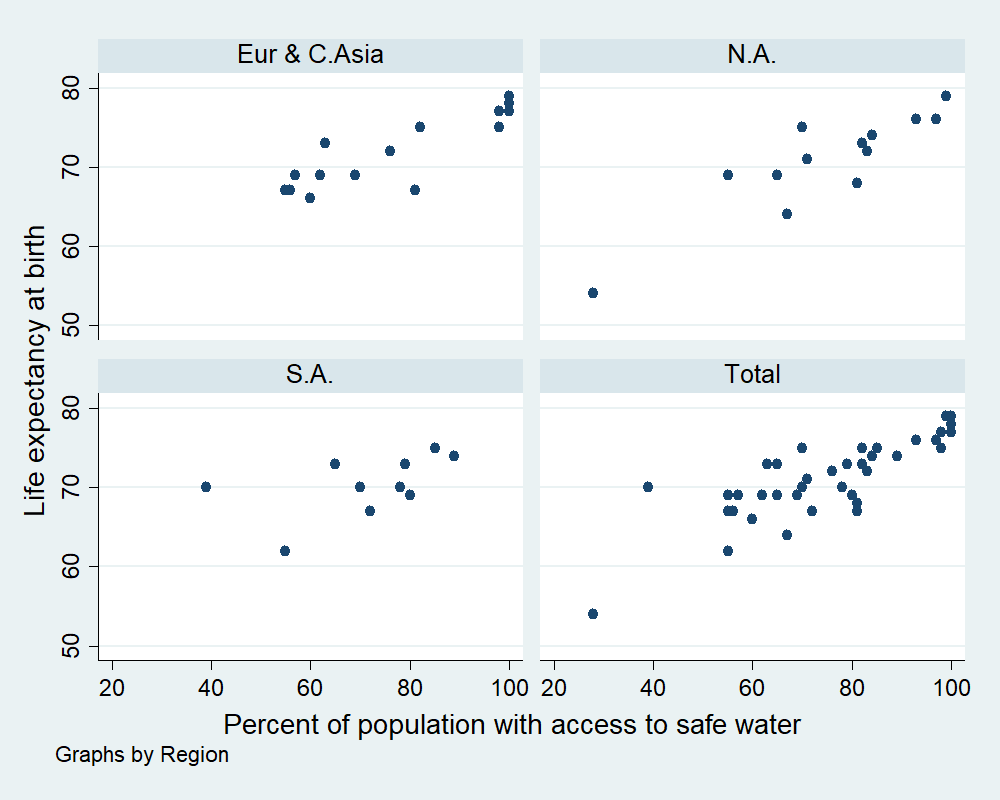

In [55]:
%%stata
sysuse lifeexp.dta, clear

twoway scatter lexp safewater, by(region, total) ///
,ytitle("Life expectancy at birth") ///
 xtitle("Percent of population with access to safe water")

## By-Graph Options

(Life expectancy, 1998)



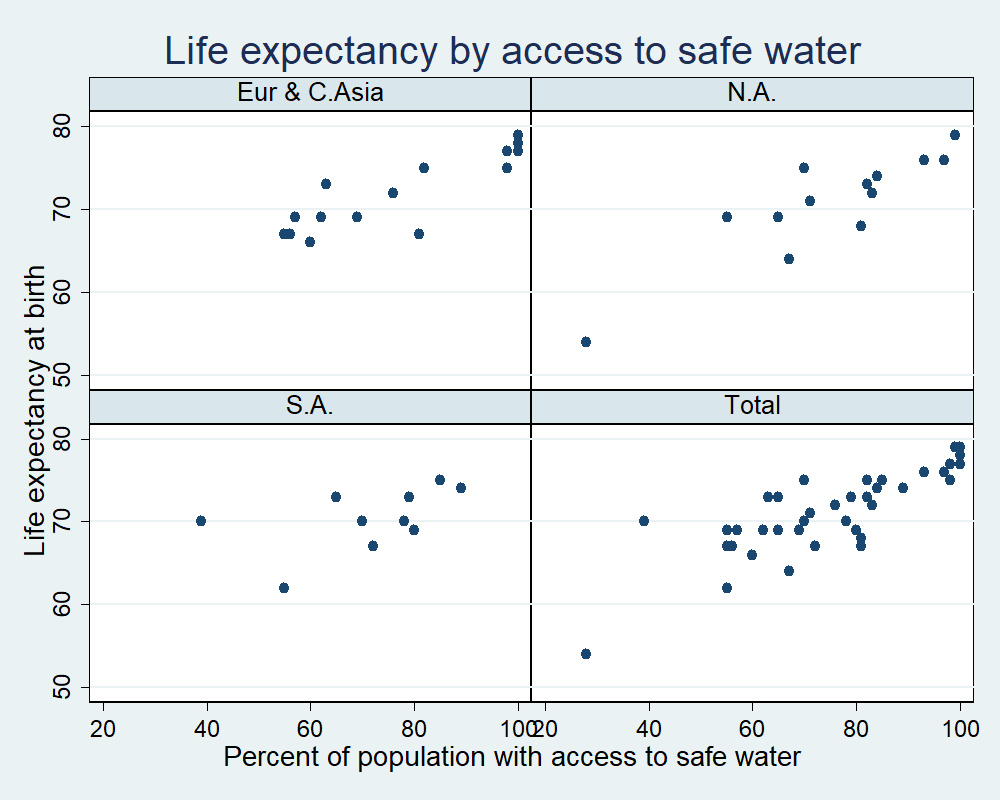

In [56]:
%%stata
sysuse lifeexp.dta, clear

twoway scatter lexp safewater ///
,by(region,total style(compact) ///
    title("Life expectancy by access to safe water") note("")) ///
 ytitle("Life expectancy at birth") ///
 xtitle("Percent of population with access to safe water")

## Axis Scale, Ticks and Labels

(Life expectancy, 1998)



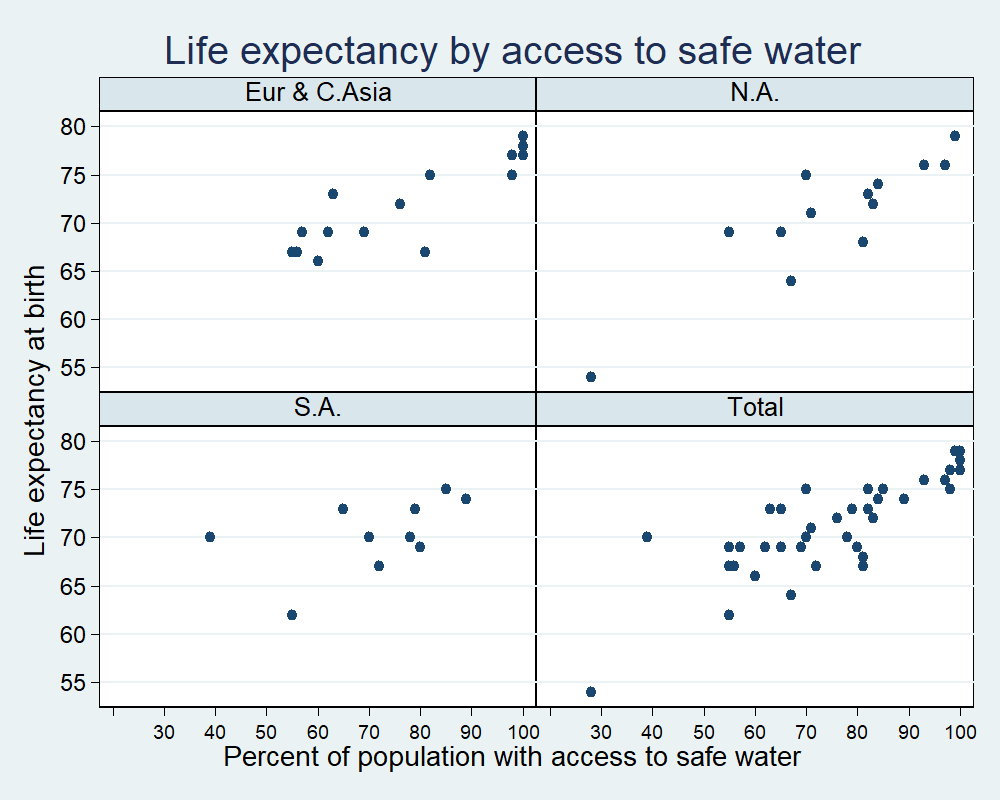

In [57]:
%%stata
sysuse lifeexp.dta, clear

twoway scatter lexp safewater ///
, by(region,total style(compact) ///
     title("Life expectancy by access to safe water") note("")) ///
 xscale(range(20 100)) ///
 xtick(20(10)100) ///
 xlabel(30(10)100, labsize(small)) ///
 xtitle("Percent of population with access to safe water") ///
 ytitle("Life expectancy at birth") ///
 ylabel(55(5)80, angle(0))

## Storing Graphs in Memory

(Life expectancy, 1998)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)

(1 real change made)



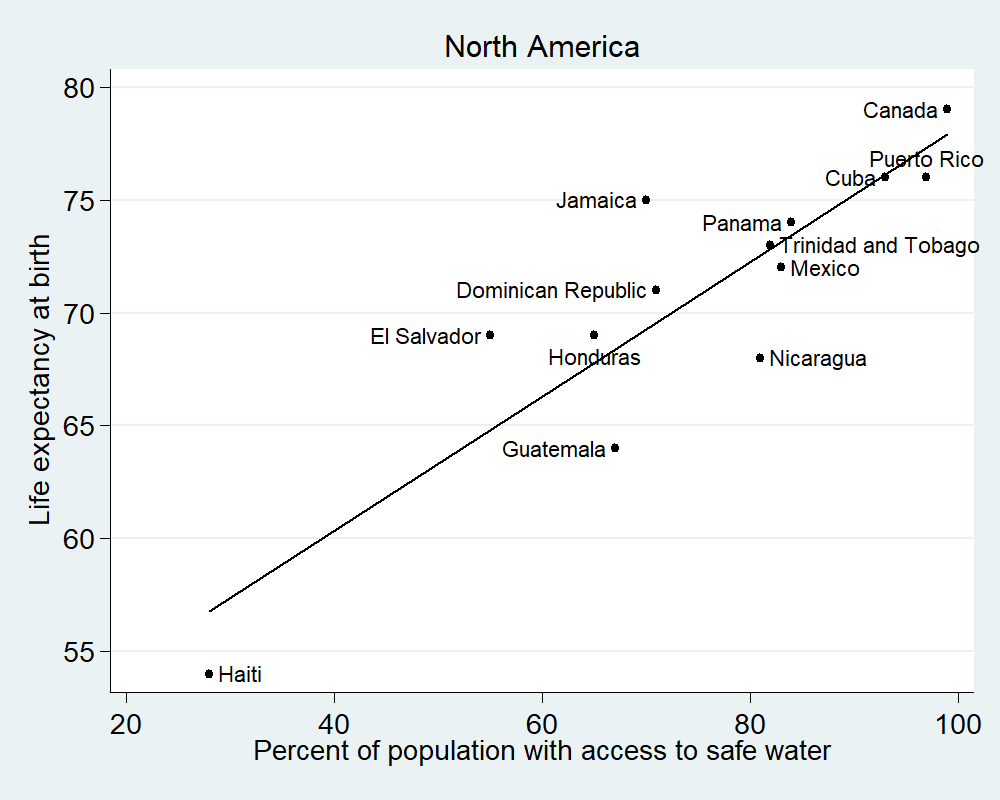

In [58]:
%%stata
sysuse lifeexp.dta, clear

generate  pos =  3
replace   pos =  6 if country == "Honduras"
replace   pos =  9 if country == "Canada"
replace   pos =  9 if country == "Cuba"
replace   pos =  9 if country == "Guatemala"
replace   pos =  9 if country == "Panama"
replace   pos =  9 if country == "Jamaica"
replace   pos =  9 if country == "Dominican Republic"
replace   pos =  9 if country == "Ecuador"
replace   pos =  9 if country == "El Salvador"
replace   pos = 12 if country == "Puerto Rico"

twoway ///
 (scatter lexp safewater if region == 2, ///
  mcolor(black) msize(small) ///
  mlabel(country) mlabvposition(pos) mlabcolor(black)) ///
 (lfit lexp safewater if region == 2, clcolor(black)) ///
,name(north_america, replace) ///
 subtitle("North America", color(black)) ///
 ylabel(,angle(0)) ///
 ytitle("Life expectancy at birth") ///
 xtitle("Percent of population with access to safe water") ///
 legend(off)

## Storing Graphs in Memory *** First create named graph above

(1 real change made)

(1 real change made)

(0 real changes made)



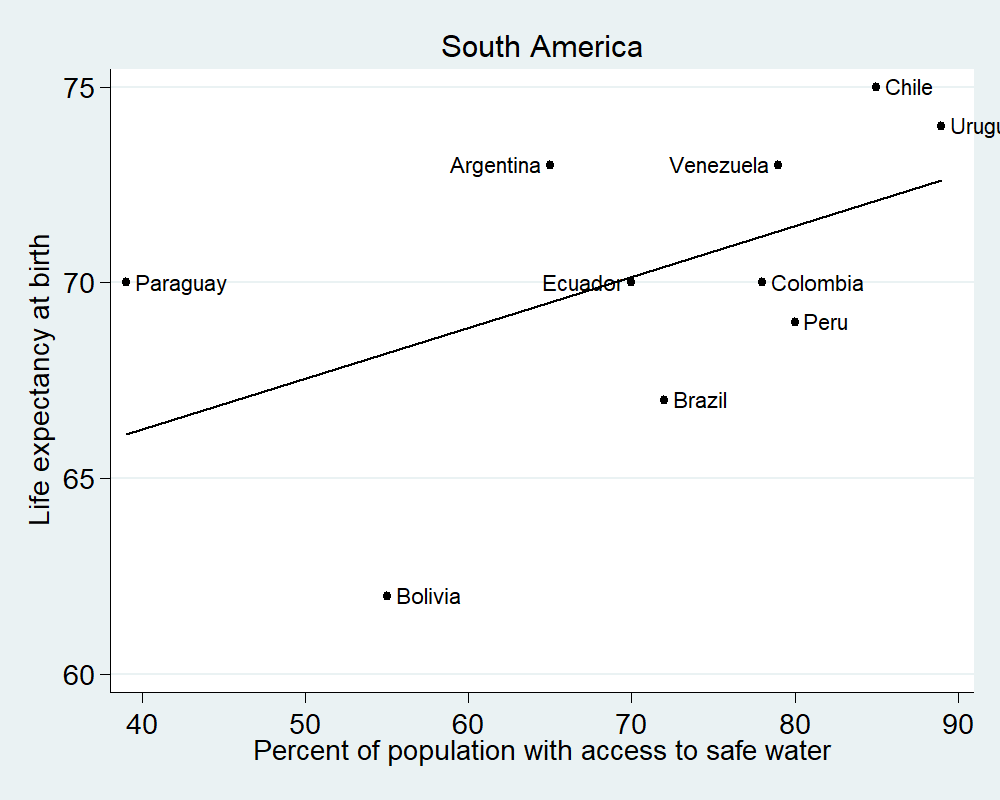

In [59]:
%%stata
replace  pos = 9 if country == "Venezuela"
replace  pos = 9 if country == "Argentina"
replace  pos = 9 if country == "Ecuador"

twoway ///
 (scatter lexp safewater if region == 3, ///
  mcolor(black) msize(small)  ///
  mlabel(country) mlabvposition(pos) mlabcolor(black)) ///
 (lfit lexp safewater if region == 3, clcolor(black)) ///
,name(south_america, replace) ///
 subtitle("South America", color(black)) ///
 ylabel(, angle(0))  ////
 ytitle("Life expectancy at birth") ///
 xtitle("Percent of population with access to safe water") ///
 legend(off)

## Combining Graphs  *** Requires named graphs created above

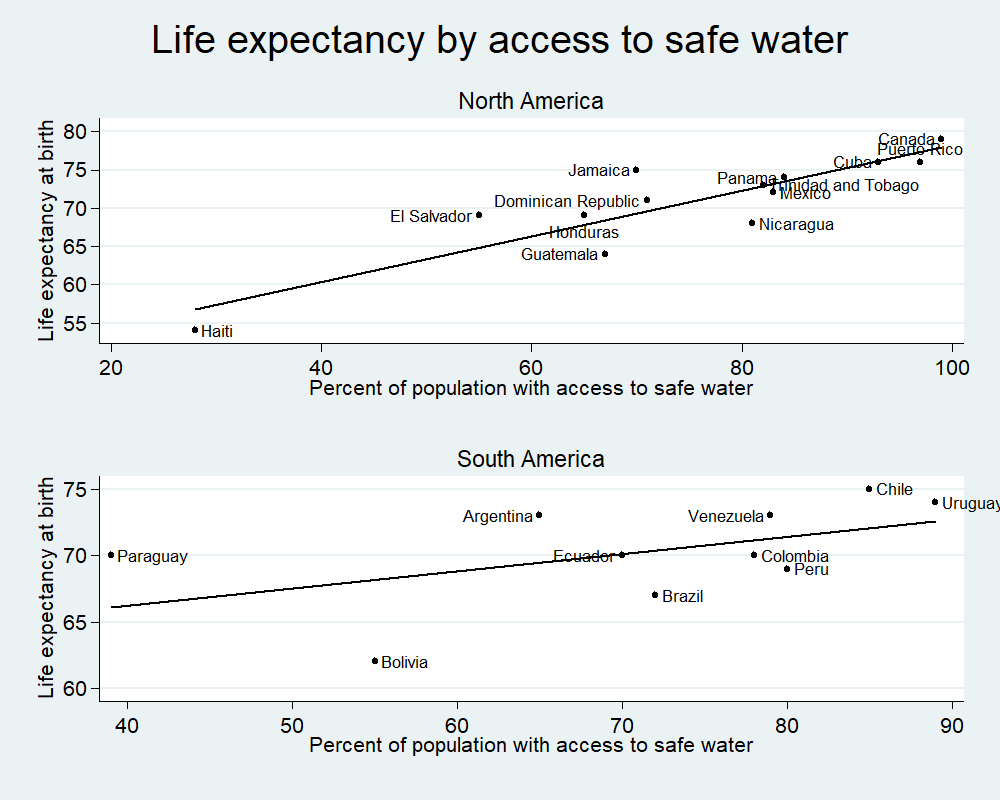

In [60]:
%%stata

graph combine north_america south_america ///
,title("Life expectancy by access to safe water", color(black)) col(1)

## Combining Graphs  *** Requires named graphs created

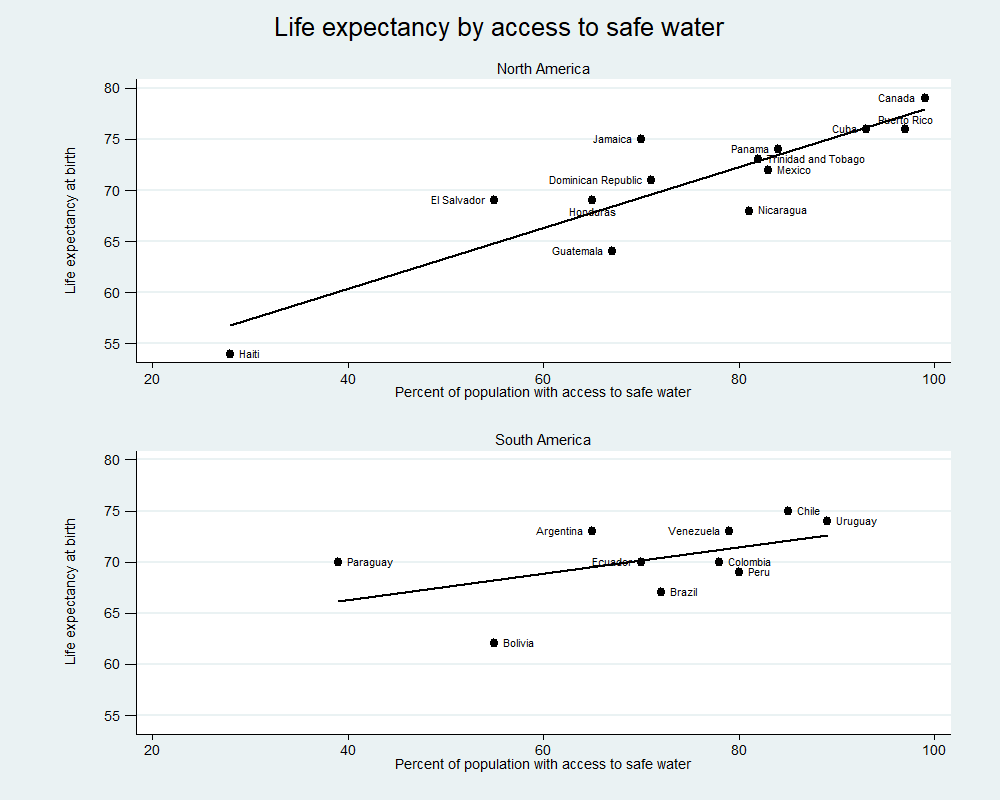

In [61]:
%%stata

graph combine north_america south_america ///
,title("Life expectancy by access to safe water", ///
 color(black)) ///
 xcommon ycommon ///
 xsize(7) ysize(10.5) ///
 col(1)

## THE GRAPH BELOW LOOKS ALMOST THE SAME AS THE GRAPH ABOVE, BUT IF YOU PLOT IT IN STATA, IT WILL LOOK MUCH MORE BEAUTIFUL 

## Different standard colors available in Stata

Unknown #command

Unknown #command



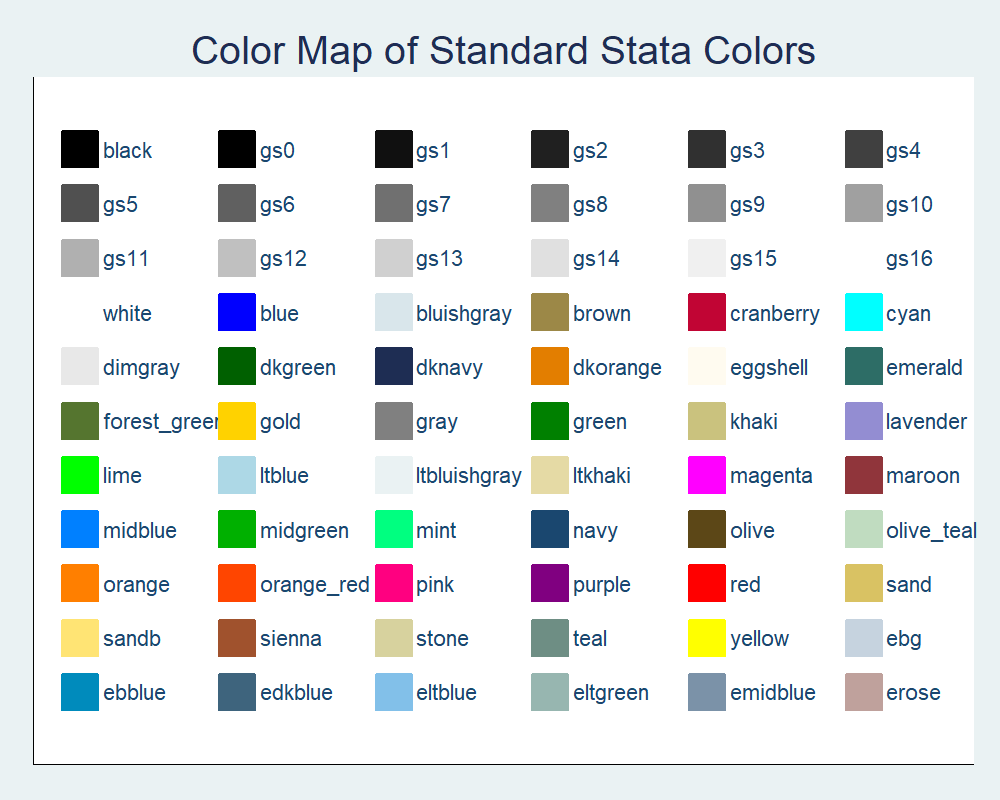

In [10]:
%%stata
#after installing "net install vgsg" type:
vgcolormap, quietly
#Change marker color in graphs by using the option mcolor()

References: <br>
https://opr.princeton.edu/workshops/Downloads/2013May_Stata12GraphicsKoffman.pdf

https://www.stata.com/bookstore/visual-guide-to-stata-graphics/